In [6]:
pwd

'C:\\Users\\supe'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.patches import Patch
import warnings



In [3]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score
)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier

In [5]:
file_path = r"C:\Users\kaust\OneDrive\Desktop\projects\diabetes_project\data\diabetes.csv"


df = pd.read_csv(file_path)


In [6]:
pd.set_option('display.max_columns', None)


In [7]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
df.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [9]:

print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


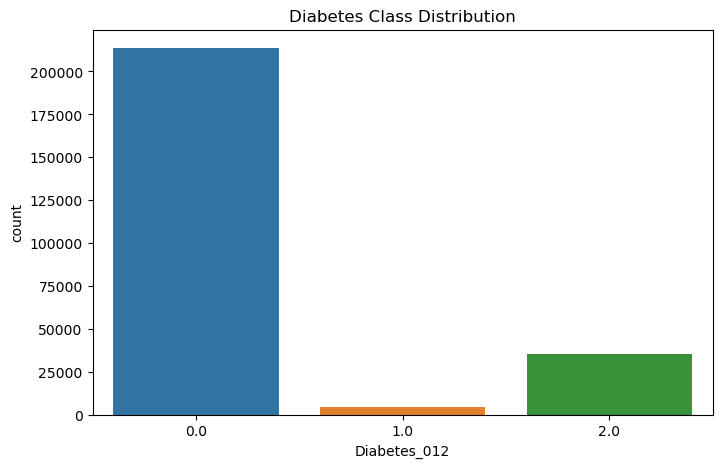

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Diabetes_012')
plt.title('Diabetes Class Distribution')
plt.show()

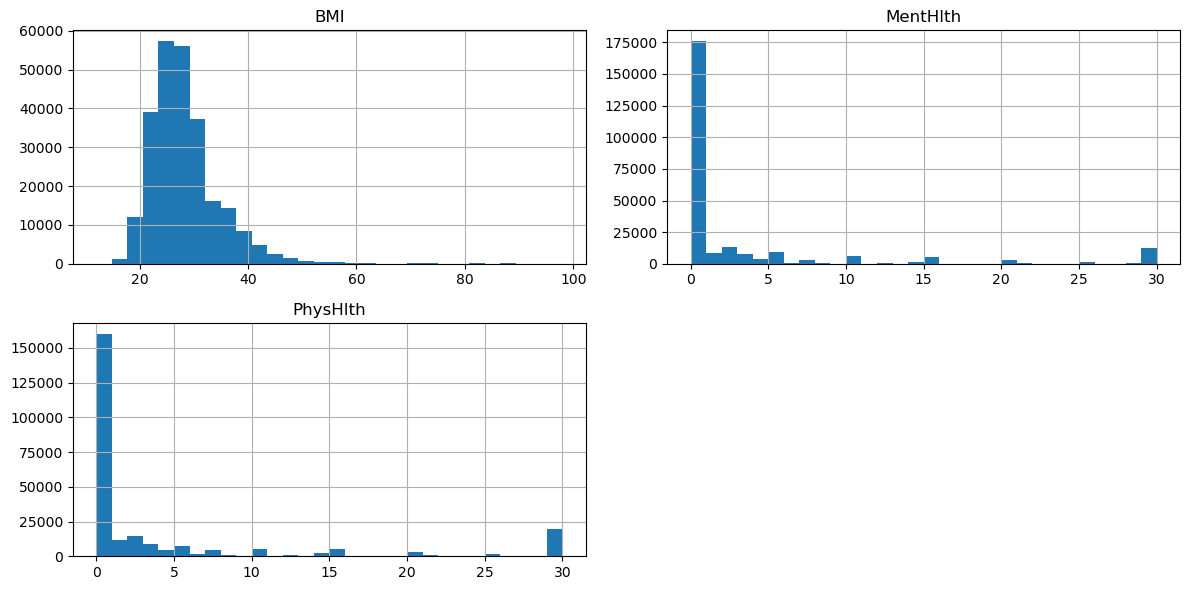

In [11]:
num_cols = ['BMI', 'MentHlth', 'PhysHlth']
df[num_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.show()

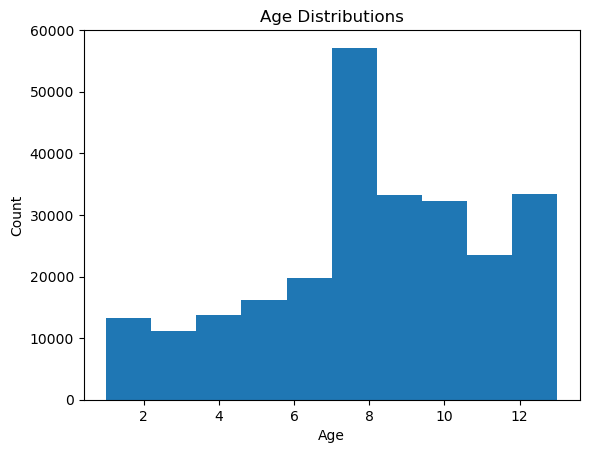

In [12]:
plt.hist(df["Age"])
plt.title("Age Distributions")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Diabetes_binary	Target	Binary		0 = no diabetes; 1 = prediabetes or diabetes
HighBP	Feature	Binary		0 = no high BP; 1 = high BP
HighChol	Feature	Binary		0 = no high cholesterol; 1 = high cholesterol
CholCheck	Feature	Binary		0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years
BMI	Feature	Integer		Body Mass Index
Smoker	Feature	Binary		Have you smoked at least 100 cigarettes in your entire life? (0 = no; 1 = yes) [Note: 5 packs = 100 cigarettes]
Stroke	Feature	Binary		Ever told you had a stroke (0 = no; 1 = yes)
HeartDiseaseorAttack	Feature	Binary		Coronary heart disease (CHD) or myocardial infarction (MI) (0 = no; 1 = yes)
PhysActivity	Feature	Binary		Physical activity in past 30 days (not including job) (0 = no; 1 = yes)
Fruits	Feature	Binary		Consume fruit 1 or more times per day (0 = no; 1 = yes)
Veggies	Feature	Binary		Consume vegetables 1 or more times per day (0 = no; 1 = yes)
HvyAlcoholConsump	Feature	Binary		Heavy drinkers (men: >14/week; women: >7/week) (0 = no; 1 = yes)
AnyHealthcare	Feature	Binary		Any health care coverage (insurance, HMO, etc.) (0 = no; 1 = yes)
NoDocbcCost	Feature	Binary		Could not see doctor due to cost in past 12 months (0 = no; 1 = yes)
GenHlth	Feature	Integer		General health (1 = excellent to 5 = poor) (1-5)
MentHlth	Feature	Integer		Days mental health was not good in past 30 days (1-30)
PhysHlth	Feature	Integer		Days physical health was not good in past 30 days (1-30)
DiffWalk	Feature	Binary		Difficulty walking or climbing stairs (0 = no; 1 = yes)
Sex	Feature	Binary	Sex	0 = female; 1 = male
Age	Feature	Integer	Age	13-level age category: 1 = 18–24; ...; 9 = 60–64; 13 = 80+ (1-13)
Education	Feature	Integer	Education	Education level (1 = no school/kindergarten; 6 = college grad) (1-6)
Income	Feature	Integer	Income	Income level (1 = <$10,000; 5 = <$35,000; 8 = $75,000+)

In [13]:
df['Diabetes_012'].value_counts().sort_index()
# 0 non and pre diabetet

0.0    213703
1.0      4631
2.0     35346
Name: Diabetes_012, dtype: int64

In [14]:
df['Diabetes_012'] =df['Diabetes_012'].replace({2:1})


df = df.rename(columns = {'Diabetes_012': 'Diabetes_binary'})

df['Diabetes_binary'].value_counts().sort_index()

0.0    213703
1.0     39977
Name: Diabetes_binary, dtype: int64

In [15]:
df.columns


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

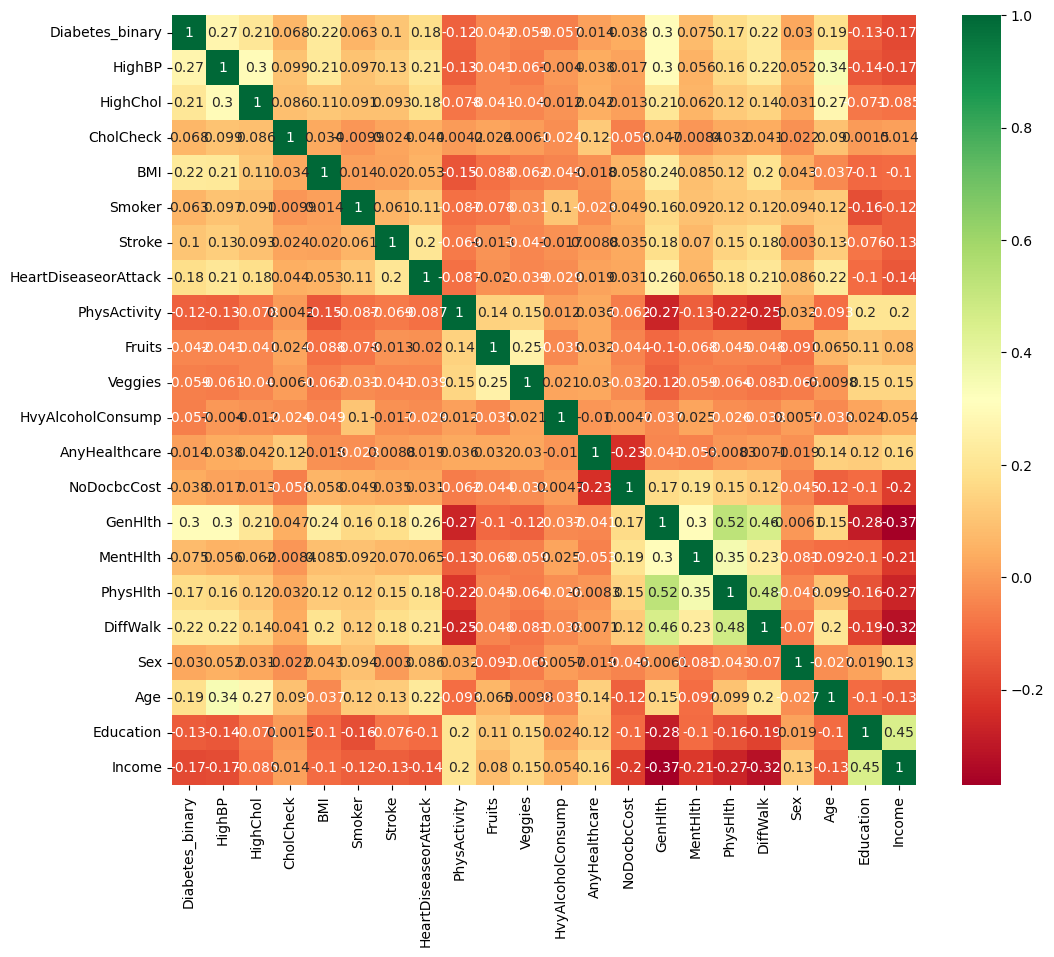

In [16]:
plt.figure(figsize=(12,10))

p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [17]:
target = 'Diabetes_binary'

binary_col = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != target
]

num_col = [
    col for col in df.columns.difference(binary_col) 
    if col != target
]

print('Binary Columns: ', binary_col)
print('Numerical Columns: ', num_col)

Binary Columns:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Numerical Columns:  ['Age', 'BMI', 'Education', 'GenHlth', 'Income', 'MentHlth', 'PhysHlth']


In [18]:
df[target].value_counts().sort_index()


0.0    213703
1.0     39977
Name: Diabetes_binary, dtype: int64

In [ ]:
#### rough 

In [19]:
def binary_var_pie(var):
    
    # Group the data
    grouped = df.groupby([target, var]).size().unstack()
    
    # Label the binary variable to blue if No, red if Yes
    labels = ['No', 'Yes']
    colors = ['#0D92F4', '#C62E2E']
    
    # Create space (1 row * 2 columns) for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Pie chart for no diabetes
    axes[0].pie(grouped.iloc[0], colors=colors, autopct='%.1f%%', startangle=90)
    axes[0].set_xlabel('No Diabetes', fontsize=10, labelpad=2)
    
    # Pie chart for diabetes
    axes[1].pie(grouped.iloc[1], colors=colors, autopct='%.1f%%', startangle=90)
    axes[1].set_xlabel('Diabetes', fontsize=10, labelpad=2)
    
    # Add a main title
    plt.suptitle(f'{var} Distribution (%)', fontsize=14, fontweight='bold')
    
    # Create a legend elements
    legend_elements = [
        Patch(facecolor=colors[0], label=labels[0]),
        Patch(facecolor=colors[1], label=labels[1])
    ]
    
    # Add a legend
    fig.legend(
        handles=legend_elements,
        loc='upper right',
        bbox_to_anchor=(1, 0.95),
        frameon=False
    )

    # Add a box around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(1)
    
    plt.tight_layout(pad=1.3)
    plt.show()

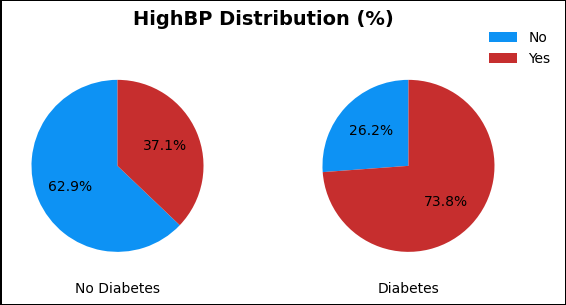

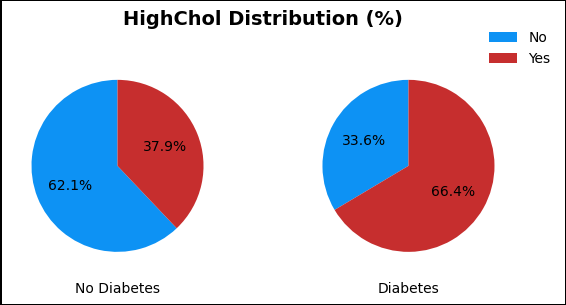

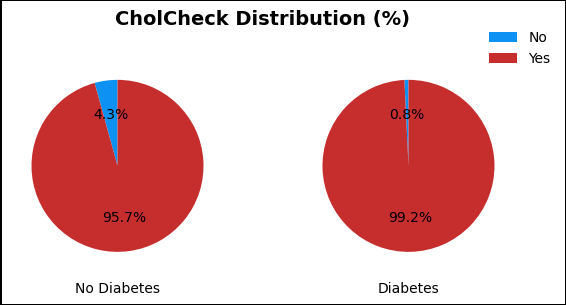

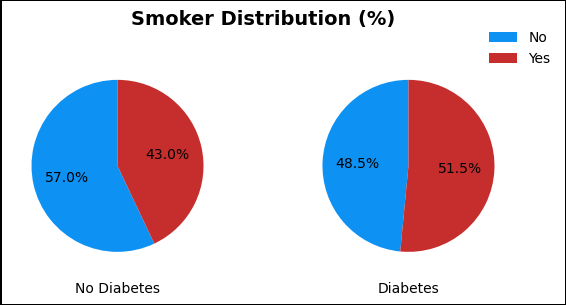

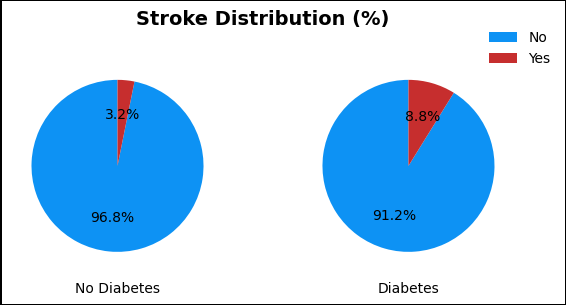

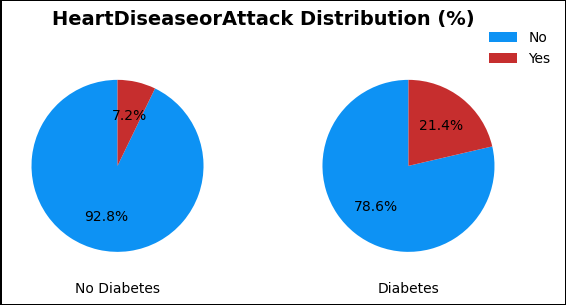

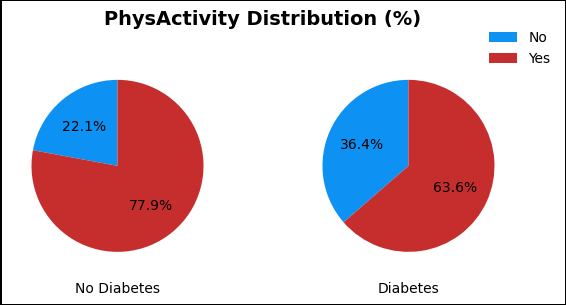

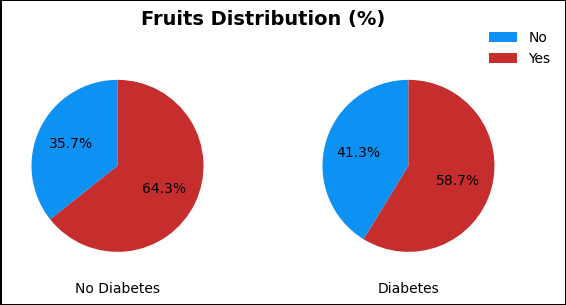

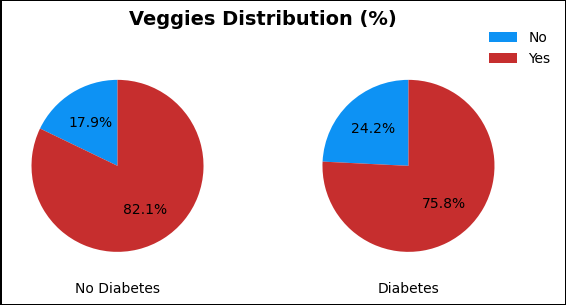

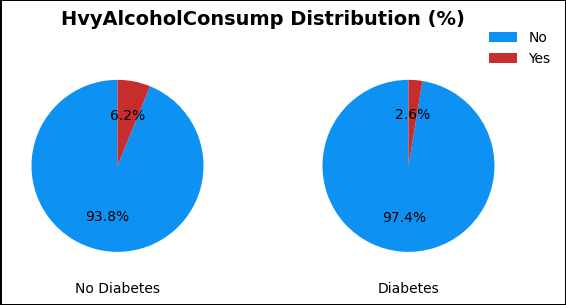

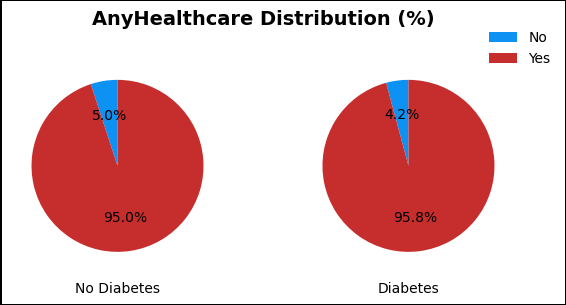

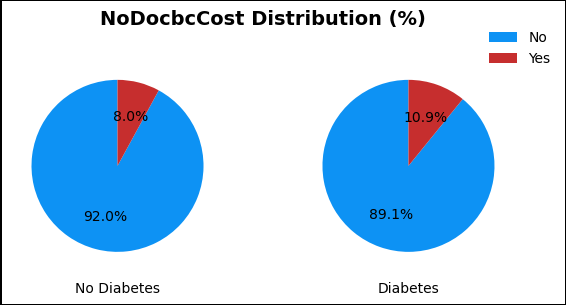

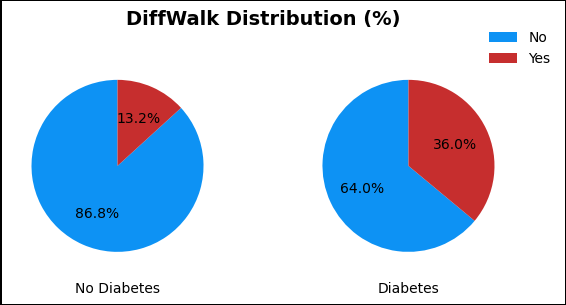

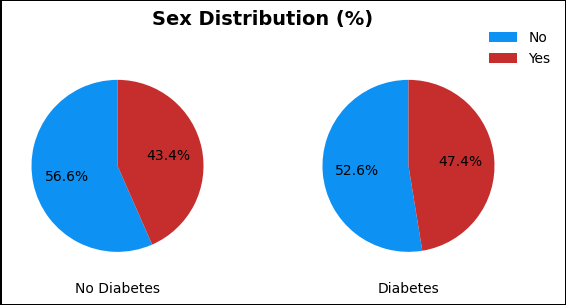

In [20]:
for col in binary_col:
    binary_var_pie(col)

In [21]:
# numerical value 
def num_var_line(var):

    # Count the number of unique values
    num_unique_vals = df[var].nunique()
    
    # Seperate numerical variables by diabetes status
    num_var_no = df[df[target] == 0][var]
    num_var_yes = df[df[target] == 1][var]
    
    # Create plot space
    plt.figure(figsize=(5, 3))
    
    # Plot histogram for no diabetes and diabetes
    # while suppressing future warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.histplot(num_var_no, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='No Diabetes',
                     color='#0D92F4',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_yes, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Diabetes',
                     color='#C62E2E',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
    
    # Format the plot
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    
    # Remove top and right spines
    plt.gca().spines[['top', 'right']].set_visible(False)
    
    # Add grid lines and legend
    plt.grid(axis='both', linestyle=':', alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


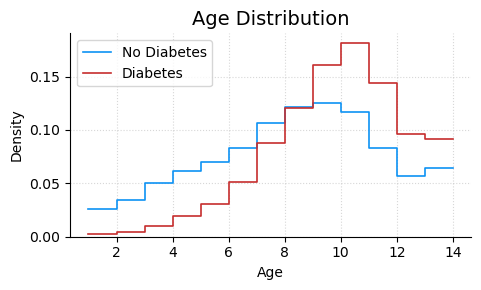

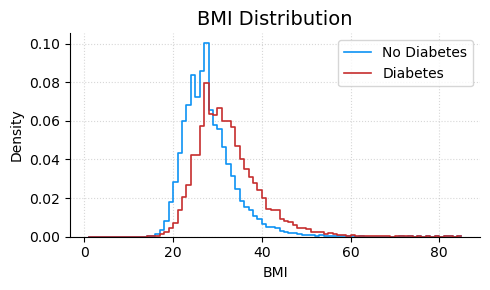

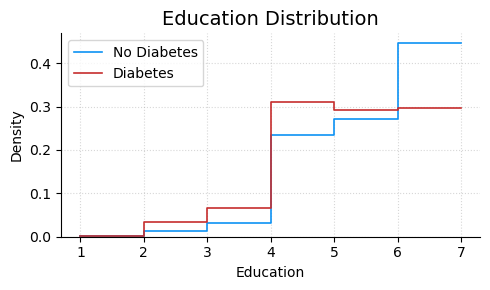

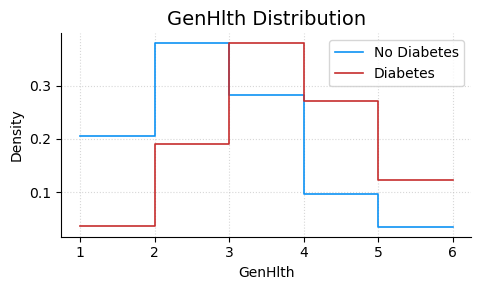

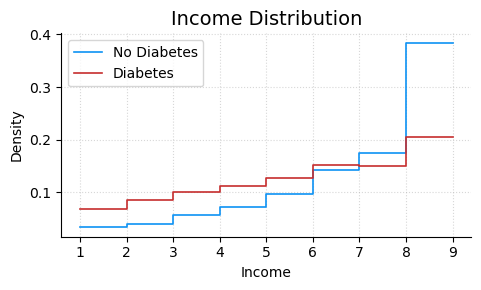

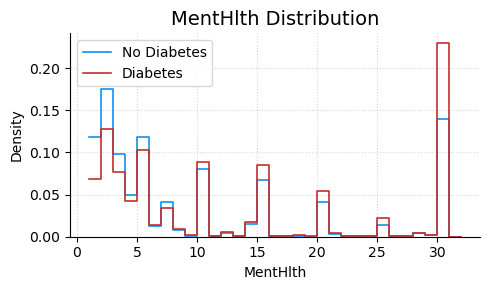

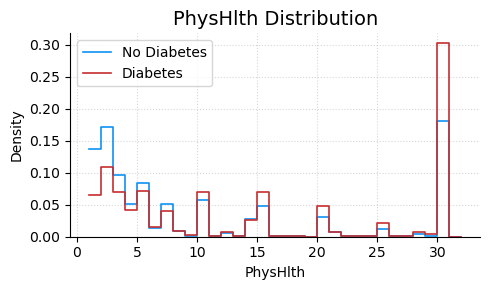

In [22]:
for col in num_col:
    num_var_line(col)

#outlieres


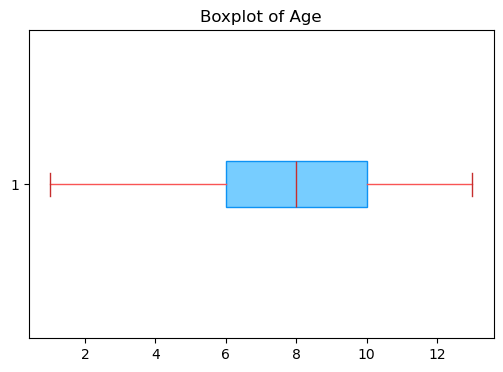

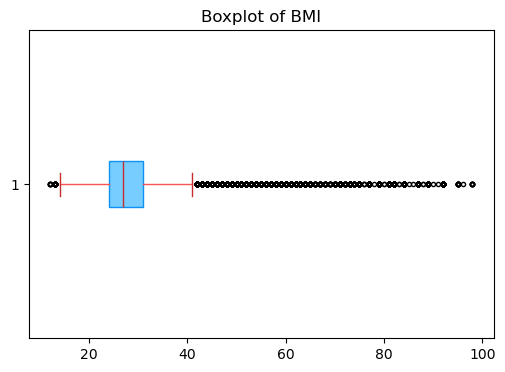

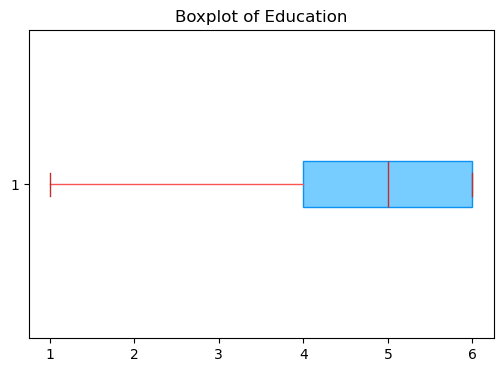

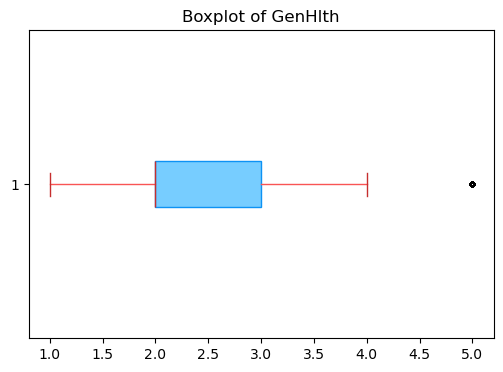

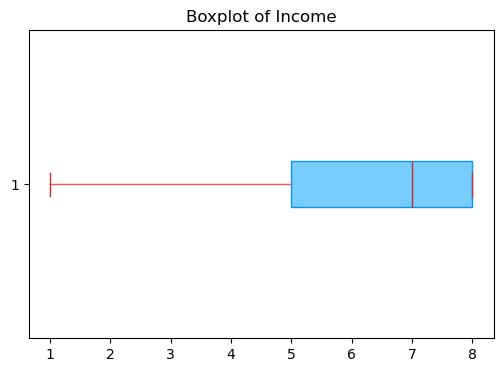

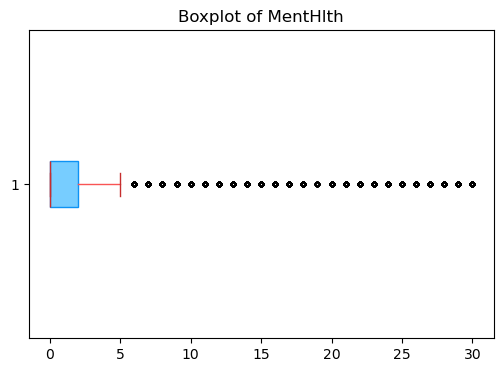

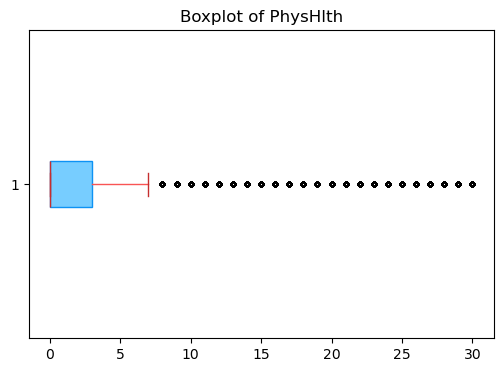

In [31]:

def plot_boxplot(df, col):
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        df[col], 
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='#77CDFF', color='#0D92F4'),
        medianprops=dict(color='#C62E2E'),
        whiskerprops=dict(color='#F95454'),
        capprops=dict(color='#C62E2E'),
        flierprops=dict(marker='o', color='#536493', markersize=3)
    )
    plt.title(f'Boxplot of {col}')

# Boxplot of numerical variables
for col in num_col:
    plot_boxplot(df, col)

In [33]:
 # positive or negative correlation 


In [23]:
#diabetes_corr = df.corr(numeric_only=True)
diabetes_corr = df.corr()


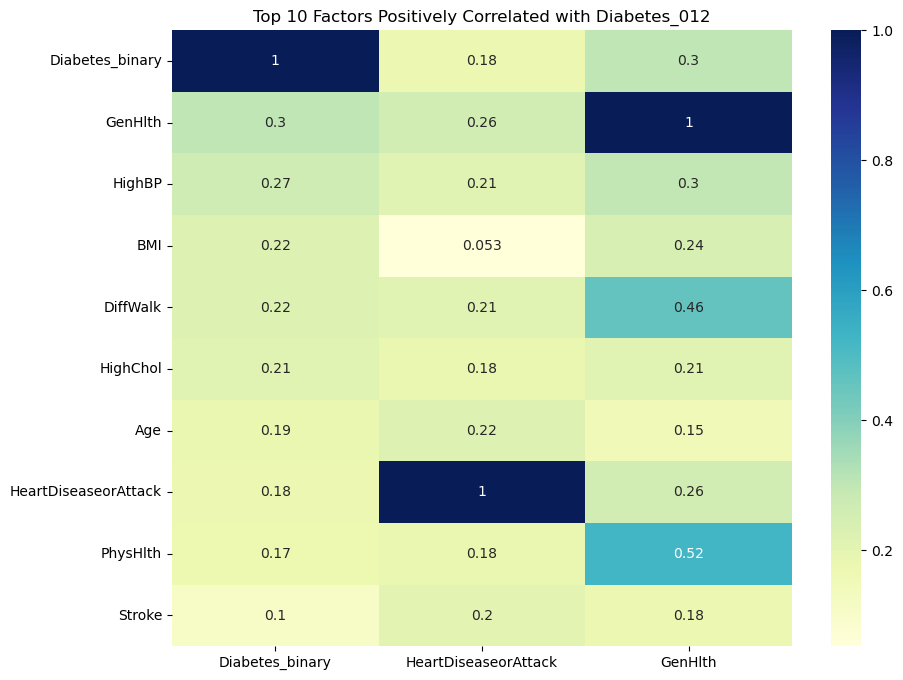

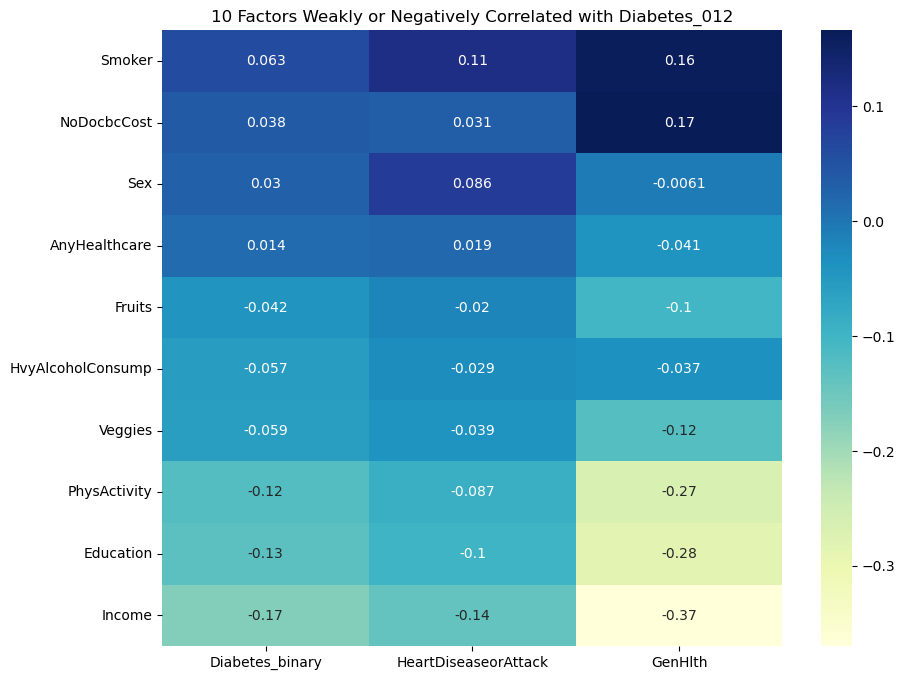

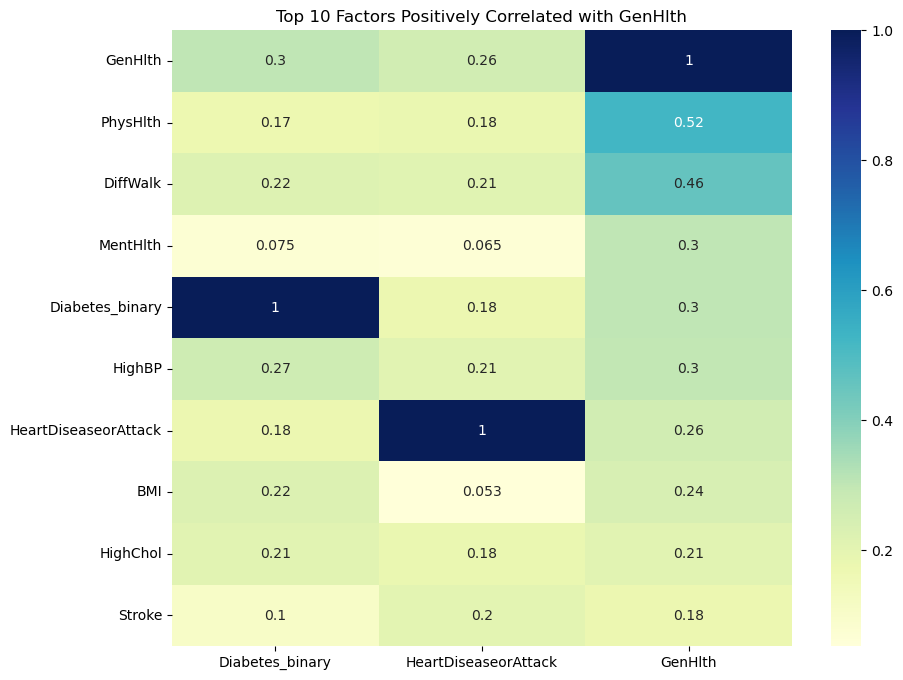

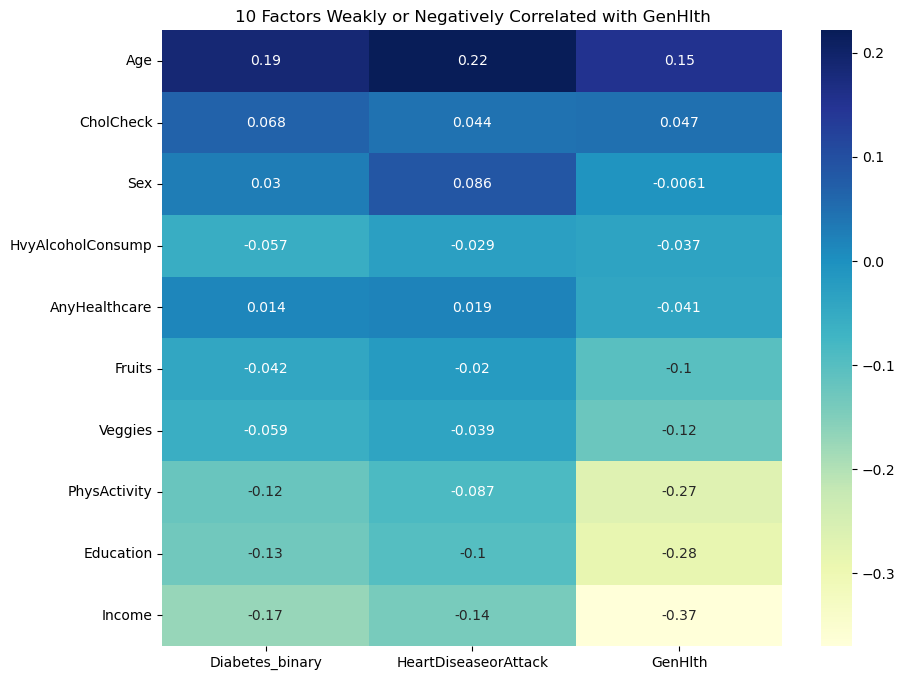

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


cols_of_interest = ['Diabetes_binary', 'HeartDiseaseorAttack', 'GenHlth']
diabetes_corr_subset = diabetes_corr[cols_of_interest].copy()


diabetes_corr_sorted = diabetes_corr_subset.sort_values(by='Diabetes_binary', ascending=False)


plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_corr_sorted.head(10), annot=True, cmap="YlGnBu")
plt.title("Top 10 Factors Positively Correlated with Diabetes_012")
plt.show()

#negative
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_corr_sorted.tail(10), annot=True, cmap="YlGnBu")
plt.title("10 Factors Weakly or Negatively Correlated with Diabetes_012")
plt.show()


genhlth_corr_sorted = diabetes_corr_subset.sort_values(by='GenHlth', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(genhlth_corr_sorted.head(10), annot=True, cmap="YlGnBu")
plt.title("Top 10 Factors Positively Correlated with GenHlth")
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(genhlth_corr_sorted.tail(10), annot=True, cmap="YlGnBu")
plt.title("10 Factors Weakly or Negatively Correlated with GenHlth")
plt.show()

In [41]:
# common funnction for classsification 


In [25]:
independent_vars = df.drop(target, axis=1)
dependent_var = df[target]

In [26]:
def classification(model, X=independent_vars, y=dependent_var):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the labels for the training data
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    # Predict the labels for the test data
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)

    # Compute additional metrics:
    # Precision, recall, F1-Score and ROC AUC
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Create a metrics DataFrame
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
    })
    
    # convert values to percentages
    for col in ['Training Accuracy',
                'Test Accuracy',
                'Precision',
                'Recall',
                'F1-Score',
                'ROC AUC']:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')
        
    # Print the DataFrame
    print(df_metrics)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    # Normalize by total number
    cm = cm / np.sum(cm)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, 
                cmap="Blues", 
                fmt='.2%', 
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Return the metrics DataFrame for further use
    return df_metrics
    

In [27]:
# decision tree

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.31%        77.78%    31.67%  34.54%   33.04%  60.17%


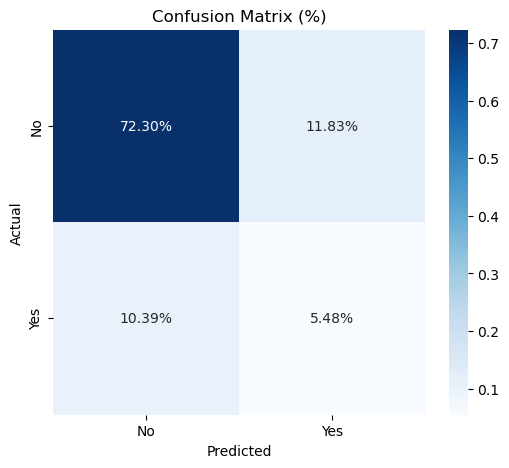

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,99.31%,77.78%,31.67%,34.54%,33.04%,60.17%


In [28]:
dt_clf = DecisionTreeClassifier(random_state=52)

classification(dt_clf)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.30%        84.00%    49.09%  20.78%   29.20%  78.90%


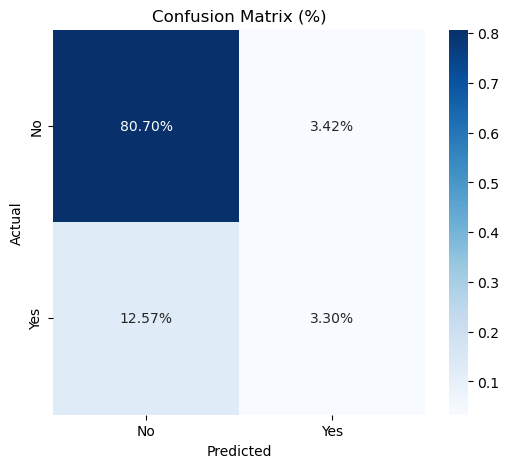

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,99.30%,84.00%,49.09%,20.78%,29.20%,78.90%


In [29]:
rnf_clf = RandomForestClassifier(random_state=52)

classification(rnf_clf)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            84.97%        85.06%    57.32%  23.04%   32.87%  81.94%


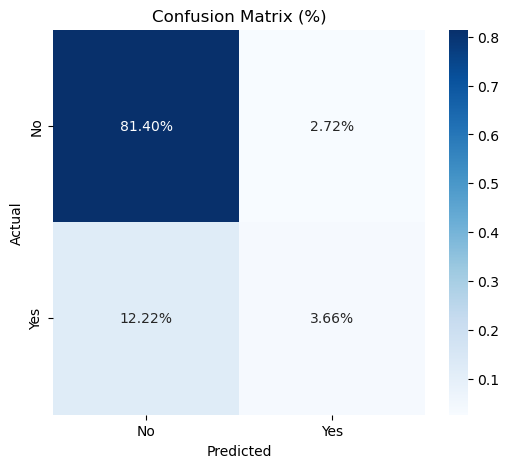

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,84.97%,85.06%,57.32%,23.04%,32.87%,81.94%


In [30]:
ada_clf = AdaBoostClassifier(random_state=52)

classification(ada_clf)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.20%        85.22%    59.60%  21.43%   31.53%  82.37%


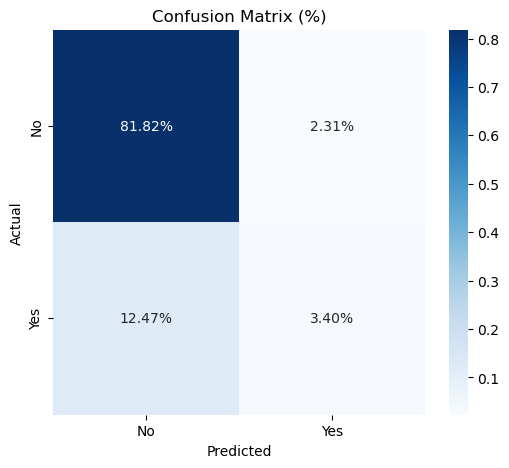

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,85.20%,85.22%,59.60%,21.43%,31.53%,82.37%


In [31]:
gbrt = GradientBoostingClassifier(random_state=52)

classification(gbrt)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            86.10%        85.00%    57.56%  20.88%   30.65%  82.14%


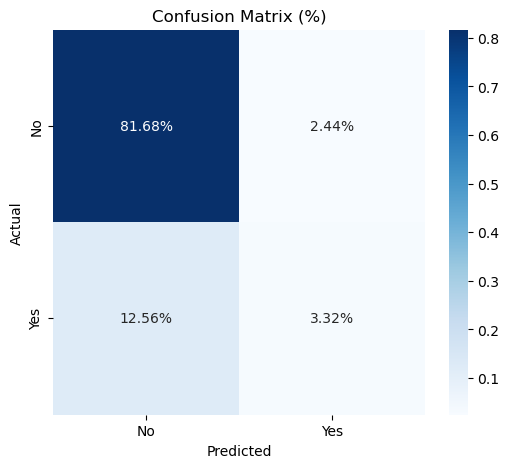

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,86.10%,85.00%,57.56%,20.88%,30.65%,82.14%


In [32]:
xgb_clf = XGBClassifier(random_state=52)

classification(xgb_clf)

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def classification_cv(model, X=independent_vars, y=dependent_var, cv_splits=5):
    # Define scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0),
        'roc_auc': 'roc_auc'
    }
    
    # Create stratified K-Fold cross-validator
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # Run cross-validation
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)

    # Collect average metrics
    df_metrics = pd.DataFrame({
        'Training Accuracy': [cv_results['train_accuracy'].mean()],
        'Test Accuracy': [cv_results['test_accuracy'].mean()],
        'Precision': [cv_results['test_precision'].mean()],
        'Recall': [cv_results['test_recall'].mean()],
        'F1-Score': [cv_results['test_f1'].mean()],
        'ROC AUC': [cv_results['test_roc_auc'].mean()]
    })
    
    


    # Convert values to percentages
    for col in df_metrics.columns:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')
    
    # Print the DataFrame
    print(df_metrics)

    return df_metrics


In [35]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree':DecisionTreeClassifier(random_state=52),
    'Random Forest':  RandomForestClassifier(random_state=52),
    'gradient boost': GradientBoostingClassifier(random_state=52),
    'adaboost':  AdaBoostClassifier(random_state=52),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}")
    df_metrics = classification_cv(model)
    results[name] = df_metrics


Evaluating Logistic Regression
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            84.80%        84.79%    55.16%  18.45%   27.65%  81.72%

Evaluating Decision Tree
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.35%        77.84%    31.41%  34.31%   32.80%  60.02%

Evaluating Random Forest
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.34%        84.28%    50.33%  20.88%   29.51%  79.30%

Evaluating gradient boost
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.20%        85.13%    57.83%  20.85%   30.65%  82.49%

Evaluating adaboost
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            84.99%        84.96%    55.75%  22.20%   31.75%  82.10%

Evaluating XGBoost
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            86.17%        85.02%    56.67%  21.04%   30.69%  82.20%


In [ ]:
#adaboost shows balanced result 

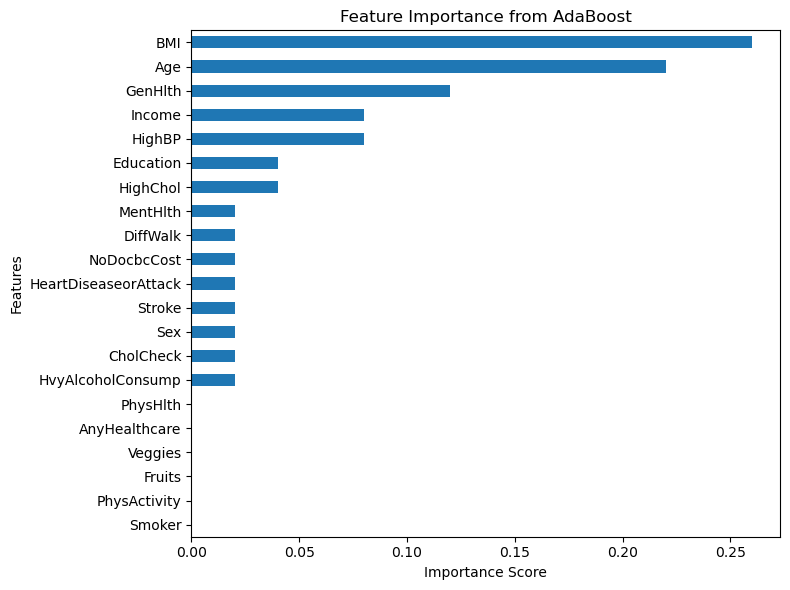

In [40]:


X=independent_vars
y=dependent_var

model = AdaBoostClassifier(random_state=42)
model.fit(X, y)

# Step 2: Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=True)

# Step 3: Plot
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='barh')
plt.title("Feature Importance from AdaBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()